#SENTIMENT ANALYSIS FOR MENTAL HEALTH

The dataset focuses on mental health sentiment analysis, containing text data that reflects individuals' thoughts, emotions, or statements alongside their corresponding mental health status. It is structured for natural language processing (NLP) tasks, particularly in classifying the mental health condition based on the given statements.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/PROJECTS/mental_health.csv')

In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.tail()

,Unnamed: 0,statement,status
10006,10006,[Tw: cutting] I have been had depression and a...,Suicidal
10007,10007,I just got diagnosed with atypical depression ...,Depression
10008,10008,"My husband finally, after all of these years, ...",Depression
10009,10009,I am very sad. I have been sad for a while now...,Depression
10010,10010,"First of all, English is not my main language ...",Suicidal


In [ ]:
df.shape

(10011, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10011 entries, 0 to 10010
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10011 non-null  int64 
 1   statement   10001 non-null  object
 2   status      10011 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.8+ KB


In [ ]:
df['status'].value_counts()

,count
status,
Normal,6249
Suicidal,1525
Depression,1504
Anxiety,733


In [ ]:
df.isnull().any()

,0
Unnamed: 0,False
statement,True
status,False


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df['status'] = df['status'].replace({'Anxiety': 0, 'Normal': 1, 'Depression': 2, 'Suicidal': 3})

<ipython-input-15-5de91631f207>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status'] = df['status'].replace({'Anxiety': 0, 'Normal': 1, 'Depression': 2, 'Suicidal': 3})


In [ ]:
df['status'].unique()

array([0, 1, 2, 3])

In [ ]:
df.dtypes

,0
statement,object
status,int64


In [ ]:
df.head()

,statement,status
0,oh my gosh,0
1,"trouble sleeping, confused mind, restless hear...",0
2,"All wrong, back off dear, forward doubt. Stay ...",0
3,I've shifted my focus to something else but I'...,0
4,"I'm restless and restless, it's been a month n...",0


In [ ]:
# Text Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def preprocess_text(text):
    cleaned_text = re.sub('[^a-zA-Z]+', ' ', text)
    tokens = word_tokenize(cleaned_text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply preprocessing to the 'statement' column
df['cleaned_statement'] = df['statement'].apply(preprocess_text)
print(df['cleaned_statement'])

0                                                  oh gosh
1             troubl sleep confus mind restless heart tune
2        wrong back dear forward doubt stay restless re...
3                       shift focus someth els still worri
4                         restless restless month boy mean
                               ...                        
10006    tw cut depress anxieti long clean cut well yea...
10007    got diagnos atyp depress still huge self reali...
10008    husband final year verbal valid feel plagu far...
10009    sad sad feel lone one one person longer anybod...
10010    first english main languag tri write best suic...
Name: cleaned_statement, Length: 10001, dtype: object


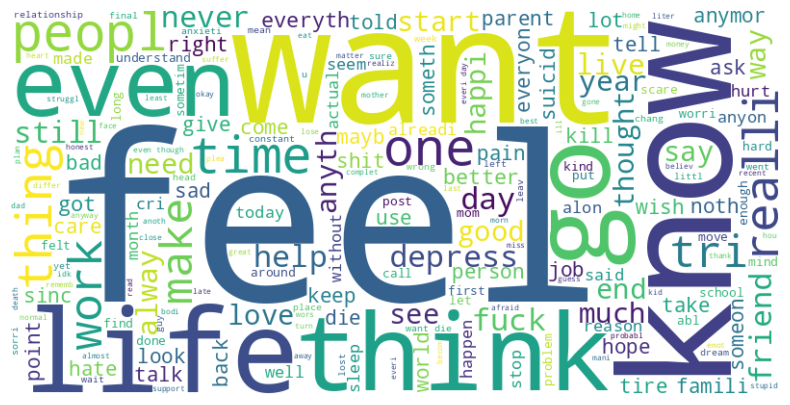

In [ ]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = ' '.join(df['cleaned_statement'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

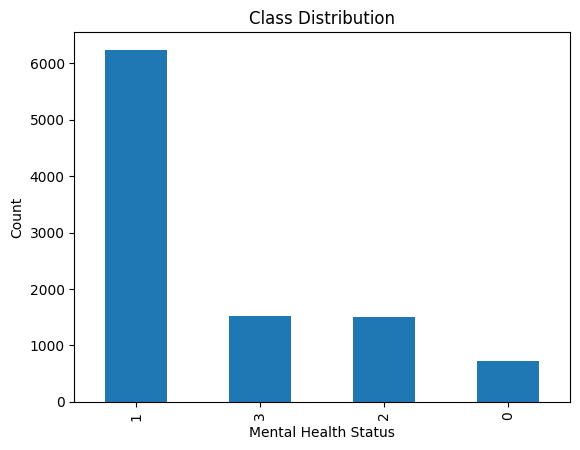

In [ ]:
# Class Distribution
df['status'].value_counts().plot(kind='bar')
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df['cleaned_statement']).toarray()
y = df['status'].values

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 3])

In [ ]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8580709645177411


In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       155
           1       0.92      0.99      0.96      1248
           2       0.67      0.62      0.65       295
           3       0.67      0.56      0.61       303

    accuracy                           0.86      2001
   macro avg       0.81      0.75      0.77      2001
weighted avg       0.85      0.86      0.85      2001



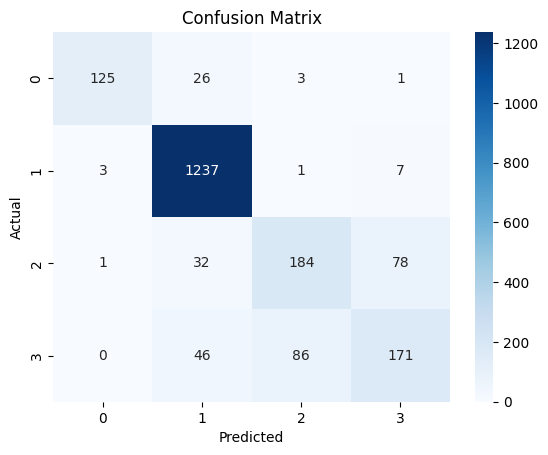

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def predict_text(text, model, vectorizer):
    processed_text = preprocess_text(text)
    text_vector = vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(text_vector)

    status_mapping = {0: 'Anxiety', 1: 'Normal', 2: 'Depression', 3: 'Suicidal'}
    return status_mapping[prediction[0]]

In [ ]:
# Predict new text
text = "I feel extremely sad and hopeless, I can't go on anymore."
predicted_status = predict_text(text, lr, vectorizer)
print("Predicted Status:", predicted_status)

Predicted Status: Depression
